**Swiggy Restaurants Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
!kaggle datasets download rrkcoder/swiggy-restaurants-dataset

Dataset URL: https://www.kaggle.com/datasets/rrkcoder/swiggy-restaurants-dataset
License(s): apache-2.0
 61% 2.00M/3.31M [00:00<00:00, 2.75MB/s]
100% 3.31M/3.31M [00:00<00:00, 3.62MB/s]


In [3]:
import zipfile

file_path = '/content/swiggy-restaurants-dataset.zip'
output_directory = '/content'
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(output_directory)

print("Unzipping completed.")


Unzipping completed.


In [4]:

df = pd.read_csv('/content/swiggy_file.csv')

In [5]:
df

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10+ ratings,₹250 for two,2,FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...,LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50+ ratings,₹250 for two,2,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10+ ratings,₹200 for two,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8 ratings,₹49 for two,5,"50% OFF UPTO ₹100\nUSE TRYNEWABOVE ₹129, FLAT ...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100+ ratings,₹200 for two,2,DEAL OF DAY\n10% OFF UPTO ₹40\nUSE STEALDEALAB...,Circular Road,No,Abohar
...,...,...,...,...,...,...,...,...,...,...
140652,Yummy Momo'S Cafe,"Chinese, Fast Food",4.6,3 ratings,₹100 for two,3,"20% OFF UPTO ₹50\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Yavatmal Locality,Yes,Yavatmal
140653,CAFE FIRST FLOOR,"Beverages, Snacks",3.2,3 ratings,₹200 for two,2,"FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500, FLAT ₹50...",Yavatmal City,Yes,Yavatmal
140654,Cafe Coffee Aani Barach Kahi,Snacks,3.2,50+ ratings,₹150 for two,2,"FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500, FLAT ₹50...",Yavatmal Locality,Yes,Yavatmal
140655,Patil Family Restaurant,"North Indian, Biryani",4.3,9 ratings,₹200 for two,2,"FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500, FLAT ₹50...",Yavatmal Locality,No,Yavatmal


**Data Cleaning**

In [ ]:
df['Average Price'] = df['Average Price'].str.extract('(\d+)').fillna(0).astype(int)


In [ ]:
df['Rating'] = df['Rating'].replace('-', '0')


In [ ]:
df['Number of Ratings'] = df['Number of Ratings'].replace('Too Few Ratings', '0')


In [ ]:
df['Number of Ratings'] = df['Number of Ratings'].str.replace(r'\+.*', '', regex=True)

In [ ]:
df['Number of Ratings'] = df['Number of Ratings'].str.replace(r'\D', '', regex=True)

In [ ]:
df['Offer Name'] = df['Offer Name'].str.replace('\n', ',')
df

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10,250,2,"FLAT DEAL,FLAT ₹125 OFF,USE FLAT125ABOVE ₹699,...",LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50,250,2,"30% OFF UPTO ₹75,USE TRYNEWABOVE ₹149, FLAT ₹1...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10,200,1,"FLAT ₹120 OFF,USE AXIS120ABOVE ₹500",Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8,49,5,"50% OFF UPTO ₹100,USE TRYNEWABOVE ₹129, FLAT D...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100,200,2,"DEAL OF DAY,10% OFF UPTO ₹40,USE STEALDEALABOV...",Circular Road,No,Abohar
...,...,...,...,...,...,...,...,...,...,...
140652,Yummy Momo'S Cafe,"Chinese, Fast Food",4.6,3,100,3,"20% OFF UPTO ₹50,USE TRYNEWABOVE ₹149, FLAT ₹1...",Yavatmal Locality,Yes,Yavatmal
140653,CAFE FIRST FLOOR,"Beverages, Snacks",3.2,3,200,2,"FLAT ₹120 OFF,USE AXIS120ABOVE ₹500, FLAT ₹50 ...",Yavatmal City,Yes,Yavatmal
140654,Cafe Coffee Aani Barach Kahi,Snacks,3.2,50,150,2,"FLAT ₹120 OFF,USE AXIS120ABOVE ₹500, FLAT ₹50 ...",Yavatmal Locality,Yes,Yavatmal
140655,Patil Family Restaurant,"North Indian, Biryani",4.3,9,200,2,"FLAT ₹120 OFF,USE AXIS120ABOVE ₹500, FLAT ₹50 ...",Yavatmal Locality,No,Yavatmal


<div style="padding: 20px;border-radius: 16px;background-color: #FF3CAC;
background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%);
color: white;text-align:center;font-family: Inter,sans-serif;">
        <h4 style="font-size: 24px;">Exploratory Data Analysis (EDA)</h4>
    </div>

In [ ]:
pure_veg_counts = df['Pure Veg'].value_counts().reset_index()
pure_veg_counts.columns = ['Pure Veg', 'Count']

fig = px.pie(
    pure_veg_counts,
    names='Pure Veg',
    values='Count',
    title='Distribution of Pure Vegetarian Restaurants',
    color_discrete_sequence=px.colors.qualitative.Set3,
    template='seaborn'
)

fig.show()

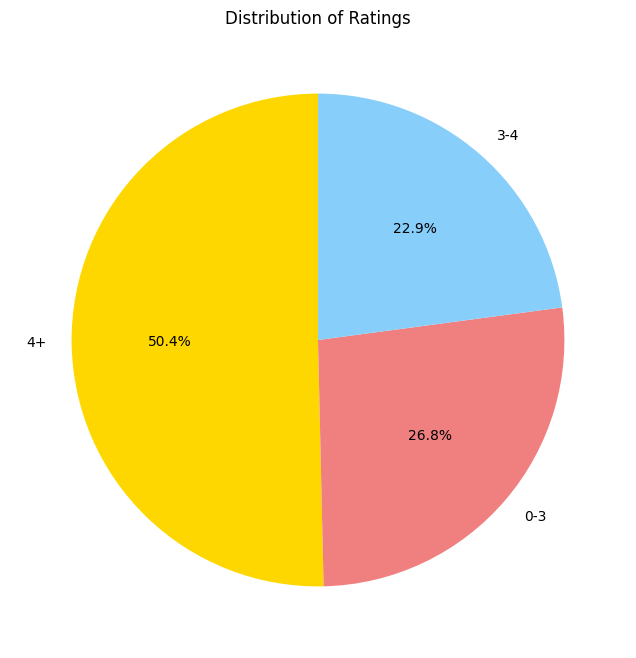

In [ ]:
import matplotlib.pyplot as plt

df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Rating Category'] = df['Rating'].apply(lambda x: '0-3' if pd.isna(x) or x < 3 else ('3-4' if x < 4 else '4+'))
rating_counts = df['Rating Category'].value_counts()
colors = ['gold', 'lightcoral', 'lightskyblue']

plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Ratings')
plt.show()


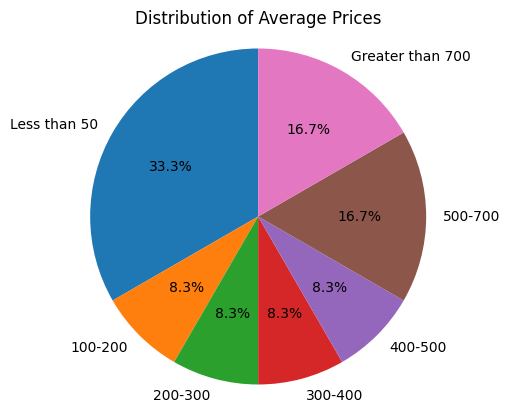

In [ ]:
unique_prices = [50, 100, 150, 200, 250, 300, 500, 400, 350, 450, 40, 0, 550, 48, 1, 600, 32, 900, 750, 800, 650, 10, 12, 850, 2]

price_ranges = {
    'Less than 50': lambda x: x < 50,
    '100-200': lambda x: 100 <= x < 200,
    '200-300': lambda x: 200 <= x < 300,
    '300-400': lambda x: 300 <= x < 400,
    '400-500': lambda x: 400 <= x < 500,
    '500-700': lambda x: 500 <= x < 700,
    'Greater than 700': lambda x: x > 700
}

price_counts = {range_name: sum(price_range(price) for price in unique_prices) for range_name, price_range in price_ranges.items()}


labels = price_counts.keys()
sizes = price_counts.values()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.title('Distribution of Average Prices')
plt.show()


In [ ]:
cuisine_column = df['Cuisine']

all_cuisines = [cuisine.split(', ') for cuisine in cuisine_column if pd.notna(cuisine)]
unique_cuisines = set([c for sublist in all_cuisines for c in sublist])

print("All Possible Cuisines:", unique_cuisines)


All Possible Cuisines: {'Bakery', 'North Indian,', 'Oriya', 'Telangana', 'Haleem', 'Afghani', 'Indian', 'Code valid on bill over Rs.500', 'Meat', 'Asian', 'Discount offer from Garden Cafe Express Kankurgachi', 'Indonesian', 'Turkish', 'Burmese', 'Waffle', 'Maharashtrian', 'Juices', 'American', 'Persian', 'Rs.40 Off', 'Burgers', 'Rolls', 'Rajasthani', 'Italian', 'snacks', 'Keto', 'Parsi', 'Malaysian', 'Korean', 'Greek', 'Tex-Mex', 'Fast Food', 'Chettinad', 'Mexican', 'South American', 'German', 'To Avail This Use Code AZAD105', 'Kerala', 'North Indian', 'Lucknowi', 'Combo', 'Italian-American', 'Tibetan', 'Tandoor ', 'Home Food', 'Tandoor', 'French', 'Mongolian', 'chinese', 'Chinese', 'Bhutanese', 'Buffalo meat', 'Rayalaseema', 'Desserts', 'Andhra', 'fast food', 'Bangladeshi', 'Street Food', 'Sushi', 'African', 'Seafood', 'Grill', 'Continental', 'Assamese', 'Ice Cream Cakes', 'Free Delivery ! Limited Stocks!', 'Jain', 'Special Discount from (The Scoop)', 'Barbecue', 'Thai', 'Burger', 'Le

In [ ]:
import pandas as pd
import plotly.express as px

cuisine_counts = df['Cuisine'].str.split(', ').explode().value_counts()
top_15_cuisines = cuisine_counts.head(15)
plot_data = pd.DataFrame({'Cuisine': top_15_cuisines.index, 'Frequency': top_15_cuisines.values})
colors = px.colors.qualitative.Set3

fig = px.bar(plot_data, x='Frequency', y='Cuisine', color='Cuisine',
             color_discrete_sequence=colors,
             orientation='h', labels={'Frequency': 'Frequency'},
             title='Top 15 Cuisines', width=800, height=500)

fig.update_layout(showlegend=False)
fig.show()


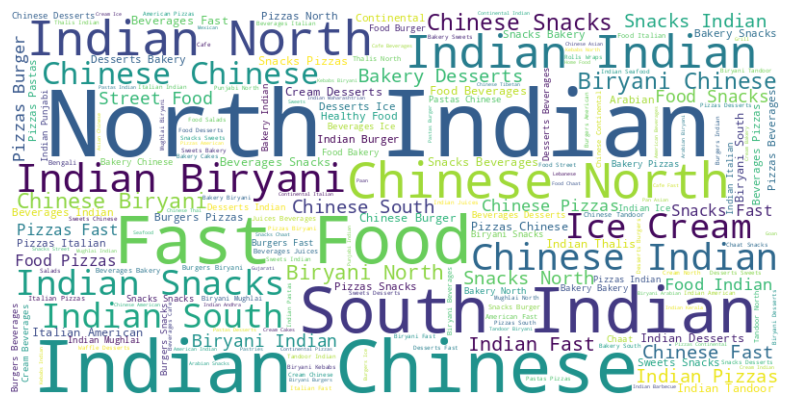

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cuisine_text = ','.join(df['Cuisine'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cuisine_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


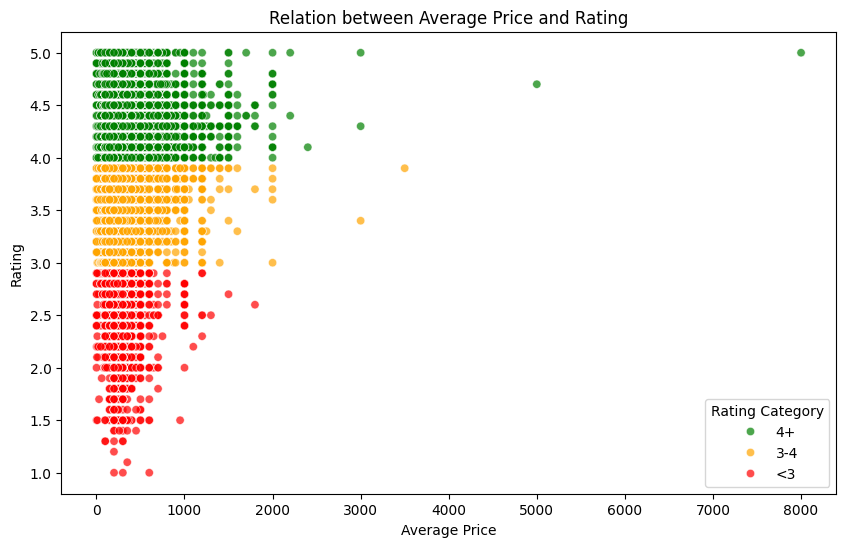

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

average_price = df['Average Price']
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

def categorize_rating(rating):
    if rating < 3:
        return '<3'
    elif 3 <= rating < 4:
        return '3-4'
    else:
        return '4+'

df['Rating Category'] = df['Rating'].apply(categorize_rating)

palette = {'<3': 'red', '3-4': 'orange', '4+': 'green'}

plt.figure(figsize=(10, 6))
sns.scatterplot(x=average_price, y=df['Rating'], hue=df['Rating Category'], palette=palette, alpha=0.7)
plt.title('Relation between Average Price and Rating')
plt.xlabel('Average Price')
plt.ylabel('Rating')
plt.legend(title='Rating Category')
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px
from geopy.geocoders import ArcGIS


df = df[df['Location'] != '-']
restaurant_count = df.groupby("Location")["Restaurant Name"].count().reset_index(name='count')

nom = ArcGIS()
restaurant_count[["Lat", "Long"]] = restaurant_count['Location'].apply(lambda x: nom.geocode(x)[1]).apply(pd.Series)


In [ ]:
fig = px.scatter_mapbox(
    restaurant_count,
    lon='Long',
    lat='Lat',
    zoom=3,
    color='Location',
    size='count',
    title='Restaurant Distribution Across Locations',
    mapbox_style='open-street-map',
)

fig.update_layout(margin={"r": 0, 't': 50, 'l': 0, 'b': 10})
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px
from geopy.geocoders import ArcGIS


df = df[df['Location'] != '-']

restaurant_count = df.groupby("Location")["Restaurant Name"].count().reset_index(name='count')

nom = ArcGIS()
restaurant_count[["Lat", "Long"]] = restaurant_count['Location'].apply(lambda x: nom.geocode(x)[1]).apply(pd.Series)

fig = px.density_mapbox(
    restaurant_count.dropna(subset=['Lat', 'Long']),
    lat='Lat',
    lon='Long',
    z='count',
    radius=10,
    zoom=4,
    mapbox_style="carto-positron",
    title='Restaurant Heatmap in India',
)

fig.show()


In [ ]:
fig = px.density_mapbox(
    restaurant_count.dropna(subset=['Lat', 'Long']),
    lat='Lat',
    lon='Long',
    z='count',
    radius=10,
    zoom=4,
    mapbox_style="carto-positron",
    title='Restaurant Heatmap in India',
)

fig.show()
